In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter, defaultdict

# Trace analysis

para usar, basta trocar a `trace_file` pelo arquivo no formato do the one

>```python
trace_file = 'arquivo_the_one.csv'
```

é preciso definir o `log_step` também (em segundos) que vai ser utilizado para analisar o trace nas últimas células (essa última parte foi retirado de [@julianofischer](@julianofischer): https://github.com/julianofischer/traceanalysis 

In [2]:
trace_file = 'rollernet_trace.csv'
grafo = defaultdict(set)
pesos = {}
max_peso = 0
line_counter = 1
endtime = 0
log_step = 60

with open('traces/' + trace_file, 'r') as f:
    for cnt, line in enumerate(f):
        line = line.split(' ')
        '''
        if cnt > 5:
            break
        '''
        if len(line) == 5 and line[4].lower() == 'up\n':
            nodes = [line[2], line[3]]
            nodes.sort()
            
            grafo[nodes[0]].add(nodes[1])
            if (nodes[0], nodes[1]) in pesos.keys():
                pesos[nodes[0], nodes[1]] += 1
            else:
                pesos[nodes[0], nodes[1]] = 1
            max_peso = max(max_peso, pesos[nodes[0], nodes[1]])
            endtime = line[0]
        elif len(line) == 5:
            endtime = line[0]

'''
for key, values in grafo.items():
    for value in values:
        print(f"{key} - {value}")
'''    
print(grafo)
for key, values in pesos.items():
    print(f"{key} - {values}")


defaultdict(<class 'set'>, {'21': {'6', '51', '43', '41', '47', '57', '36', '58', '54', '26', '25', '40', '5', '39', '50', '34', '37', '32', '55', '52', '60', '28', '31', '61', '44', '49', '59', '29', '7', '53', '8', '42', '9', '3', '48', '56', '45', '38', '23', '46', '22', '30', '4', '24', '33'}, '30': {'6', '51', '43', '47', '41', '57', '36', '58', '54', '40', '5', '39', '50', '34', '37', '32', '55', '52', '60', '31', '61', '44', '49', '59', '7', '53', '8', '35', '42', '9', '48', '56', '45', '38', '46', '4', '33'}, '33': {'6', '51', '43', '47', '41', '57', '36', '58', '54', '40', '5', '39', '37', '34', '50', '55', '52', '60', '61', '44', '49', '59', '7', '53', '8', '35', '42', '9', '48', '56', '45', '38', '46', '4'}, '39': {'6', '51', '43', '41', '47', '57', '58', '54', '40', '5', '50', '55', '52', '60', '61', '44', '49', '59', '53', '8', '7', '42', '9', '48', '56', '45', '46', '4'}, '43': {'6', '51', '47', '57', '58', '54', '5', '50', '55', '52', '60', '61', '44', '49', '59', '7', '

('14', '60') - 27
('47', '59') - 17
('17', '4') - 18
('11', '60') - 20
('12', '22') - 9
('5', '54') - 27
('41', '57') - 8
('15', '7') - 18
('15', '55') - 7
('10', '48') - 25
('25', '26') - 9
('4', '40') - 10
('41', '51') - 15
('15', '60') - 30
('15', '58') - 34
('7', '8') - 44
('10', '46') - 20
('2', '47') - 17
('41', '53') - 14
('11', '44') - 29
('13', '41') - 8
('27', '32') - 17
('0', '58') - 39
('20', '41') - 11
('41', '60') - 6
('0', '41') - 12
('18', '40') - 16
('18', '31') - 29
('2', '20') - 24
('3', '6') - 24
('10', '22') - 24
('19', '40') - 27
('26', '4') - 5
('41', '58') - 9
('5', '58') - 20
('18', '26') - 7
('14', '57') - 16
('20', '46') - 11
('46', '59') - 15
('41', '59') - 7
('51', '57') - 59
('60', '8') - 41
('13', '2') - 22
('53', '57') - 55
('11', '57') - 50
('1', '57') - 56
('46', '54') - 34
('21', '4') - 27
('36', '9') - 16
('15', '54') - 62
('55', '7') - 31
('2', '55') - 22
('54', '8') - 86
('15', '22') - 11
('2', '58') - 40
('20', '57') - 53
('42', '57') - 28
('13', 

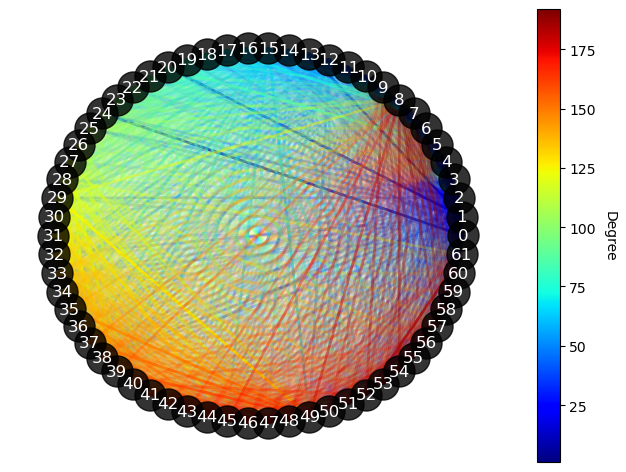

In [3]:
## Monta o grafo usando nx
H = nx.DiGraph()
labels = {}
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
max_peso_aux = 0.99

for key, values in grafo.items():
    for value in values:
        #print(f"{key} - {value} - {pesos[key, value]}")
        H.add_edge(int(key), int(value), weight = pesos[key, value])
        labels[int(key)] = int(key)
        labels[int(value)] = int(value)

#'''
G=nx.DiGraph()
G.add_nodes_from(sorted(H.nodes))
G.add_edges_from(list(H.edges()))
#'''
        
pos = nx.layout.shell_layout(G)

## draw labels
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color='white')
#nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

index = 0
for edge in G.edges:
    valor = pesos[str(list(edge)[0]), str(list(edge)[1])]/max_peso
    edge_alphas[index] = valor
    index+=1

nodes = nx.draw_networkx_nodes(G, pos, node_color='black',
                              node_size=500, alpha=0.8)
edges = nx.draw_networkx_edges(G, pos, arrowstyle='-',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.get_cmap('jet'), width=2, alpha=1)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.get_cmap('jet'))
pc.set_array(range(1,max_peso))
cbar = plt.colorbar(pc)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Degree', rotation=270)

ax = plt.gca()
ax.set_axis_off()
#plt.figure(5,figsize=(12,12))
plt.show()

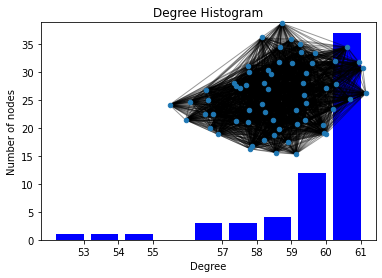

In [4]:
import collections
G_bidirecional = nx.Graph()

for key, values in grafo.items():
    for value in values:
        #print(f"{key} - {value} - {pesos[key, value]}")
        G_bidirecional.add_edge(int(key), int(value), weight = pesos[key, value])
        
degree_sequence = sorted([d for n, d in G_bidirecional.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')
plt.style.use('seaborn-dark-palette')
plt.style.use('grayscale')
fig.patch.set_facecolor('white')

plt.title("Degree Histogram")
plt.ylabel("Number of nodes")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_axisbelow(True)
#ax.grid(linestyle=':', linewidth='0.5', color='black')

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G_bidirecional.subgraph(sorted(nx.connected_components(G_bidirecional), key=len, reverse=True)[0])
pos = nx.spring_layout(G_bidirecional)
plt.axis('off')
nx.draw_networkx_nodes(G_bidirecional, pos, node_size=20)
nx.draw_networkx_edges(G_bidirecional, pos, alpha=0.4)

plt.show()

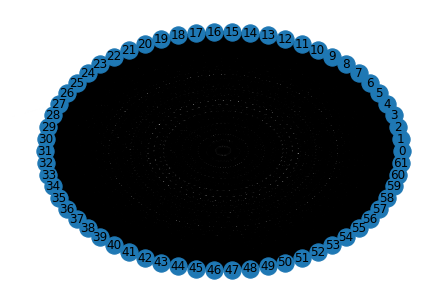

Betweenness
00 0.000
01 0.000
02 0.000
03 0.000
04 0.000
05 0.000
06 0.000
07 0.000
08 0.000
09 0.000
10 0.000
11 0.000
12 0.000
13 0.000
14 0.000
15 0.000
16 0.000
17 0.000
18 0.000
19 0.000
20 0.000
21 0.000
22 0.000
23 0.000
24 0.000
25 0.000
26 0.000
27 0.000
28 0.000
29 0.000
30 0.000
31 0.000
32 0.000
33 0.000
34 0.000
35 0.000
36 0.000
37 0.000
38 0.000
39 0.000
40 0.000
41 0.000
42 0.000
43 0.000
44 0.000
45 0.000
46 0.000
47 0.000
48 0.000
49 0.000
50 0.000
51 0.000
52 0.000
53 0.000
54 0.000
55 0.000
56 0.000
57 0.000
58 0.000
59 0.000
60 0.000
61 0.000
Degree centrality
00 1.000
01 1.000
02 1.000
03 0.951
04 1.000
05 0.967
06 1.000
07 1.000
08 1.000
09 0.967
10 1.000
11 1.000
12 0.885
13 0.984
14 1.000
15 0.934
16 0.984
17 0.967
18 1.000
19 1.000
20 0.984
21 0.951
22 1.000
23 0.902
24 1.000
25 1.000
26 0.934
27 0.869
28 1.000
29 1.000
30 0.984
31 1.000
32 1.000
33 1.000
34 1.000
35 0.967
36 1.000
37 1.000
38 1.000
39 1.000
40 1.000
41 0.984
42 1.000
43 1.000
44 1.000
45 0.98

In [5]:
from operator import itemgetter

pos = nx.spring_layout(G, iterations=500)
nx.draw_circular(G, with_labels=True)
plt.show()        

print("Betweenness")
b = nx.betweenness_centrality(G)
for v in sorted(G.nodes()):
    print("%0.2d %5.3f" % (int(v), b[v]))

print("Degree centrality")
d = nx.degree_centrality(G)
for v in sorted(G.nodes()):
    print("%0.2d %5.3f" % (int(v), d[v]))

print("Closeness centrality")
c = nx.closeness_centrality(G)
for v in sorted(G.nodes()):
    print("%0.2d %5.3f" % (int(v), c[v]))

print("Degree")
for v in sorted(G.nodes()):
    print("%0.2d %5.3f" % (int(v), G.degree[v]))

In [6]:
# coding: utf-8

__author__ = "Juliano Fischer Naves"


class Event:
    def __init__(self, d):
        self.from_node = d["from"]
        self.to_node = d["to"]
        self.time = d["time"]
        self.__status = d["status"].lower()
        self.opening = None

        #print("Constructing event with status %s" % (self.__status,))

        if self.__status == "up":
            self.opening = True
        elif self.__status == "down":
            self.opening = False
        else:
            raise Exception("Evento não é down nem up (%s)" % (self.__status,))

    def is_opening(self):
        return self.opening

    def __str__(self):
        return "event [%d,%d,%d,%s]" % (self.time, self.from_node, self.to_node, self.__status)


class Connection:
    def __init__(self, event):

        self.end_time = None

        if event:
            self.from_node = event.from_node
            self.to_node = event.to_node
            self.init_time = event.time

    def duration(self):
        assert self.end_time, "end_time not set - unable to compute duration"
        return self.end_time - self.init_time

    def get_id(self):
        return str(min(self.from_node, self.to_node)) + ":"+str(max(self.from_node,self.to_node))

    # Se a conexão já foi fechada
    def was_closed(self):
        return self.end_time is None

    # def __eq__(self, other):
    #    return isinstance(other,self.__class__) and self.from_node == other.from_node and self.to_node == other.to_node and self.init_time == other.init_time

    def is_same_connection(self, c):
        return (c.from_node == self.from_node and self.to_node == c.to_node) or (
            c.from_node == self.to_node and c.to_node == self.from_node)

        # def __hash__(self):
        #    if self.from_node > self.to_node:
        #        return hash((self.from_node, self.to_node))
        #    else:
        #        return hash((self.to_node,self.from_node))

    def __str__(self):
        end = self.end_time if self.end_time is not None else -1
        return "connection [%d, %d, %d, %d]" % (self.init_time, self.from_node, self.to_node, end)

In [7]:
# coding: utf-8

import argparse
import networkx as nx
import warnings
import os
import shutil

__author__ = "Juliano Fischer Naves"

PASTA = trace_file + '_analyzed/'
COMPONENTS_FILE_NAME = PASTA + "components_log.txt"
CONNECTIONSLOG_FILE_NAME = PASTA + "connections_out_file.txt"

LARGEST_CONNECTED_COMPONENT_REPORT = PASTA + "largest_connected_components_report.txt"

NUMBER_OF_CONNECTED_COMPONENTS_REPORT = PASTA + "number_of_connected_components_report.txt"

CONNECTIONS_DURATION_CDF_REPORT = PASTA + "connections_duration_pdf_report.txt"

def _init(log_step = 30):
    global g, last_file_position, __f, number_of_nodes, endtime, created_connections, \
        open_connections, largest_connected_component, logging_step, last_log, connected_components_log, \
    max_node_degree, list_of_average_node_degrees

    number_of_nodes = int(len(G.nodes))

    g = nx.Graph()
    g.add_nodes_from(range(number_of_nodes))

    last_file_position = None

    filename = 'traces/' + trace_file
    __f = open(filename)
    
    ## cria pasta para os analyzed
    if os.path.exists(PASTA):
        shutil.rmtree(PASTA)
    os.mkdir(PASTA)

    # default value is 30
    logging_step = int(log_step)
    endtime = int(endtime)

    created_connections = []
    open_connections = []
    connected_components_log = {}
    largest_connected_component = 0
    last_log = 0
    max_node_degree = 0;
    list_of_average_node_degrees = []

# convert a trace line to an object of Event
def get_event(line):
    l = line.split()
    d = dict()
    d["from"] = int(l[2])
    d["to"] = int(l[3])
    d["event"] = l[1]
    d["time"] = int(l[0])
    d["status"] = l[4]
    e = Event(d)
    return e

    
# apply and event to the graph (add or remove an edge)
def apply_graph_change(event):
    if event.is_opening():
        g.add_edge(event.from_node, event.to_node)
    else:
        if g.has_edge(event.from_node, event.to_node):
            g.remove_edge(event.from_node, event.to_node)
        else:
            warnings.warn("Trying to remove an inexistent edge")

            
# receives an event and remove a connection from open_connections besides add closing time to the object of Connection
def close_connection(e):
    to_remove = None
    for c in open_connections:
        if c.is_same_connection(e):
            c.end_time = e.time
            to_remove = c
            break
    try:
        open_connections.remove(to_remove)
    except:
        pass


# returns the events of this instant
def get_events_at_instant(time):
    global last_file_position
    last_file_position = __f.tell()
    l = __f.readline().strip()
    _list = []

    # end of the file
    if len(l) == 0:
        return _list

    e = get_event(l)

    # only events of this instant (now)
    while e.time == time:
        _list.append(e)
        last_file_position = __f.tell()
        l = __f.readline().strip()

        # end of the file
        if len(l) == 0:
            break

        e = get_event(l)

    # the last read event occurred after "instant"
    # Moves the file pointer to the last read line
    __f.seek(last_file_position)

    return _list


# e: the event to be processed
def process_event(e):
    apply_graph_change(e)

    # add one connection to open_connections or close the connection
    if e.is_opening():
        c = Connection(e)
        open_connections.append(c)
        created_connections.append(c)
    else:
        # it is a connection closing event
        close_connection(e)
        
# run the analysis from begin to ending
def run():
    global largest_connected_component, last_log, max_node_degree, list_of_average_node_degrees

    for instant in range(0, endtime+1):
        if instant%3600 == 0:
            print(f"processing {instant/3600} hour...")
        events = get_events_at_instant(instant)

        for e in events:
            process_event(e)

        # get the largest_connected_component
        connected_components = nx.connected_components(g)
        largest = max([len(x) for x in connected_components])
        largest_connected_component = largest if largest > largest_connected_component else largest_connected_component

        list_of_connected_components = list(nx.connected_components(g))

        degrees = [g.degree(node) for node in g.nodes()]
        max_node_degree = max(max_node_degree, max(degrees))

        list_of_average_node_degrees.append(sum(degrees)/len(degrees))

        # instant is equivalent to 'now'
        if instant - last_log >= logging_step:
            last_log = instant
            # connected_components_log.append("%d    %s\n" % (instant, str(list_of_connected_components)))
            connected_components_log[instant] = list_of_connected_components

    close_remaining_connections(endtime)
    # perform post processing information extraction
    post_processing()

# setting end time for connections which are not closed at trace ending
def close_remaining_connections(t):
    for c in open_connections:
        c.end_time = t


# perform post processing information extraction
def post_processing():
    # write down the log information
    print('\t#### Dados sobre o trace %s ####' % (trace_file,))
    print('\tGranularidade (s): %d' % (int(logging_step),))
    print('\tNumber of nodes: %d\n\n' % (len(G.nodes()),))
    print("Number of connections: %d" % (get_number_of_connections(),))
    print("Average number of connections (per nodes): %f" % (get_average_number_of_connections(),))
    print("Connections per minute: %f" % (get_connections_per_minute(), ))
    print("Total connection time: %d" % (get_total_connection_time(),))
    print("Average connection time (per connection): %f" % (get_average_connection_time()))
    print("Largest connected component: %d" % (largest_connected_component,))
    print("Average largest connected component %f" % (get_average_largest_connected_component(),))
    print("Median largest connected component %f" % (get_median_largest_connected_component(),))
    print("Average number of connected components %f" % (get_average_number_of_connected_components(),))
    print("Median number of connected components %f" % (get_median_number_of_connected_components(),))
    print("Max node degree: %d" % (max_node_degree,))
    print("Average node degree: %f" % (get_average_node_degree(),))
    do_the_log()


def do_the_log():
    # logging components
    components_file = open(COMPONENTS_FILE_NAME, "w+")
    for key in sorted(connected_components_log):
        components_file.write("%d    %s\n" % (key, str(connected_components_log[key])))

    # logging connections
    connections_out_file = open(CONNECTIONSLOG_FILE_NAME, "w+")
    connections_out_file.writelines([str(c)+"\n" for c in created_connections])

    # largest connected component
    log_largest_connected_component_evolution()

    # number of connected components
    log_number_of_connected_components()

    log_connection_duration_pdf()


# get de average node degree (number of links)
def get_average_node_degree():
    return sum(list_of_average_node_degrees)/len(list_of_average_node_degrees)


# get the total number of connections
def get_number_of_connections():
    return len(created_connections)


# get the average number of connections by node
def get_average_number_of_connections():
    return get_number_of_connections() / number_of_nodes


# get the total connection time - sum of duration of all connections
def get_total_connection_time():
    return sum(c.duration() for c in created_connections)


# get the average connection time  - total_connection_time/total_of_connections
def get_average_connection_time():
    return get_total_connection_time() / get_number_of_connections()


# get the number of connections per minute
def get_connections_per_minute():
    minutes = endtime / 60
    return get_number_of_connections() / minutes


# format: time    largest_connected_component
# output: largest_connected_components_report.txt
def log_largest_connected_component_evolution():
    with open(LARGEST_CONNECTED_COMPONENT_REPORT, "w+") as f:
        for key in sorted(connected_components_log):
            components = connected_components_log[key]
            largest = max([len(x) for x in components])
            f.write("%d    %d\n" % (key, largest))


def get_cdf(a_list):
    d = {}
    a_list = sorted(a_list)
    size = len(a_list)
    for i, item in enumerate(a_list):
        d[item] = (i+1)/size

    return d


def log_connection_duration_pdf():
    durations = [c.duration() for c in created_connections]
    cdf_dict = get_cdf(durations)

    with open(CONNECTIONS_DURATION_CDF_REPORT, "w+") as f:
        for i in cdf_dict:
            f.write("%f    %f\n" % (i, cdf_dict[i]))


   # with open(CONNECTIONS_DURATION_PDF_REPORT,"w+") as f:
   #    for d in durations:
   #         f.write("%f    ")




def get_average_largest_connected_component():
    l = []
    for components in connected_components_log.values():
        l.append(max([len(x) for x in components]))

    return sum(l)/len(l)


def get_median_largest_connected_component():
    l = []
    for components in connected_components_log.values():
        l.append(max([len(x) for x in components]))

    return get_median(l)


# format: time    number of components (partitions)
# output: number_of_connected_components_report.txt
def log_number_of_connected_components():
    with open(NUMBER_OF_CONNECTED_COMPONENTS_REPORT, "w+") as f:
        for key in sorted(connected_components_log):
            number_of_components = len(connected_components_log[key])
            f.write("%d    %d\n" % (key, number_of_components))


def get_average_number_of_connected_components():
    l = [len(x) for x in connected_components_log.values()]
    return sum(l) / len(l)


def get_median_number_of_connected_components():
    l = [len(x) for x in connected_components_log.values()]
    return get_median(l)


# returns the median value of a list
def get_median(l):
    l = sorted(l)
    if len(l) % 2 == 1:
        return l[len(l)//2]
    else:
        return (l[len(l)//2] + l[(len(l)//2)-1])/2    
    
_init(log_step)
run()

processing 0.0 hour...


C:\Users\User\miniconda3\lib\site-packages\ipykernel_launcher.py:74: UserWarning: Trying to remove an inexistent edge


processing 1.0 hour...
processing 2.0 hour...
	#### Dados sobre o trace rollernet_trace.csv ####
	Granularidade (s): 60
	Number of nodes: 62


Number of connections: 60146
Average number of connections (per nodes): 970.096774
Connections per minute: 355.893491
Total connection time: 14194981
Average connection time (per connection): 236.008729
Largest connected component: 62
Average largest connected component 56.923077
Median largest connected component 62.000000
Average number of connected components 6.023669
Median number of connected components 1.000000
Max node degree: 40
Average node degree: 19.647048


In [8]:
print('finished')

finished
